In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Multiple%20linear%20regression/ToyotaCorolla.csv",encoding='latin1')

In [3]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
# scatter matrix, corelation matrix
# pairplot,pd.plotting.scatter_matrix.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
#check for missing values
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [6]:
df.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 4.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='Id', ylabel='Id'>,
        <AxesSubplot:xlabel='Price', ylabel='Id'>,
        <AxesSubplot:xlabel='Age_08_04', ylabel='Id'>,
        <AxesSubplot:xlabel='KM', ylabel='Id'>,
        <AxesSubplot:xlabel='HP', ylabel='Id'>,
        <AxesSubplot:xlabel='Doors', ylabel='Id'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='Id'>,
        <AxesSubplot:xlabel='Gears', ylabel='Id'>,
        <AxesSubplot:xlabel='Weight', ylabel='Id'>],
       [<AxesSubplot:xlabel='Id', ylabel='Price'>,
        <AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Age_08_04', ylabel='Price'>,
        <AxesSubplot:xlabel='KM', ylabel='Price'>,
        <AxesSubplot:xlabel='HP', ylabel='Price'>,
        <AxesSubplot:xlabel='Doors', ylabel='Price'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='Price'>,
        <AxesSubplot:xlabel='Gears', ylabel='Price'>,
        <AxesSubplot:xlabel='Weight', ylabel='Price'>],
       [<AxesSubplot:xlabel='Id', ylabel='Age_08_04'>

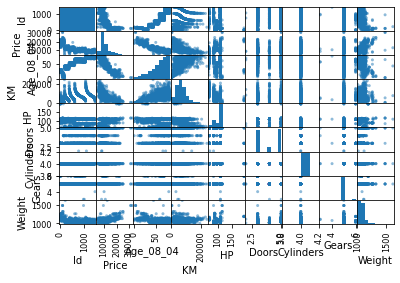

In [10]:
pd.plotting.scatter_matrix(df)

In [8]:
# Scatterplot between variables along with histograms

# Preparing a model

In [9]:
#Build model
import statsmodels.formula.api as smf 
import pandas as pd
df=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/Latest-Data-Science-Assignments-Material/Day-14-Multi-Linear-Regression/Data-Sets/Toyoto_Corrola.csv",encoding='latin1')


In [11]:
model = smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=df).fit()

In [12]:
#Coefficients
model.params

Intercept    -410.845504
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [13]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Cylinders    -5.323309
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Cylinders     1.181900e-07
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

In [15]:
# Simple Linear Regression Models.

ml_v=smf.ols('Price~Age_08_04',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


In [16]:
ml_w=smf.ols('Price~KM',data = df).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [20]:
ml_wv=smf.ols('Price~KM+Age_08_04',data = df).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept    146.258516
KM           -12.130199
Age_08_04    -56.334219
dtype: float64 
 Intercept    0.000000e+00
KM           2.636340e-32
Age_08_04    0.000000e+00
dtype: float64


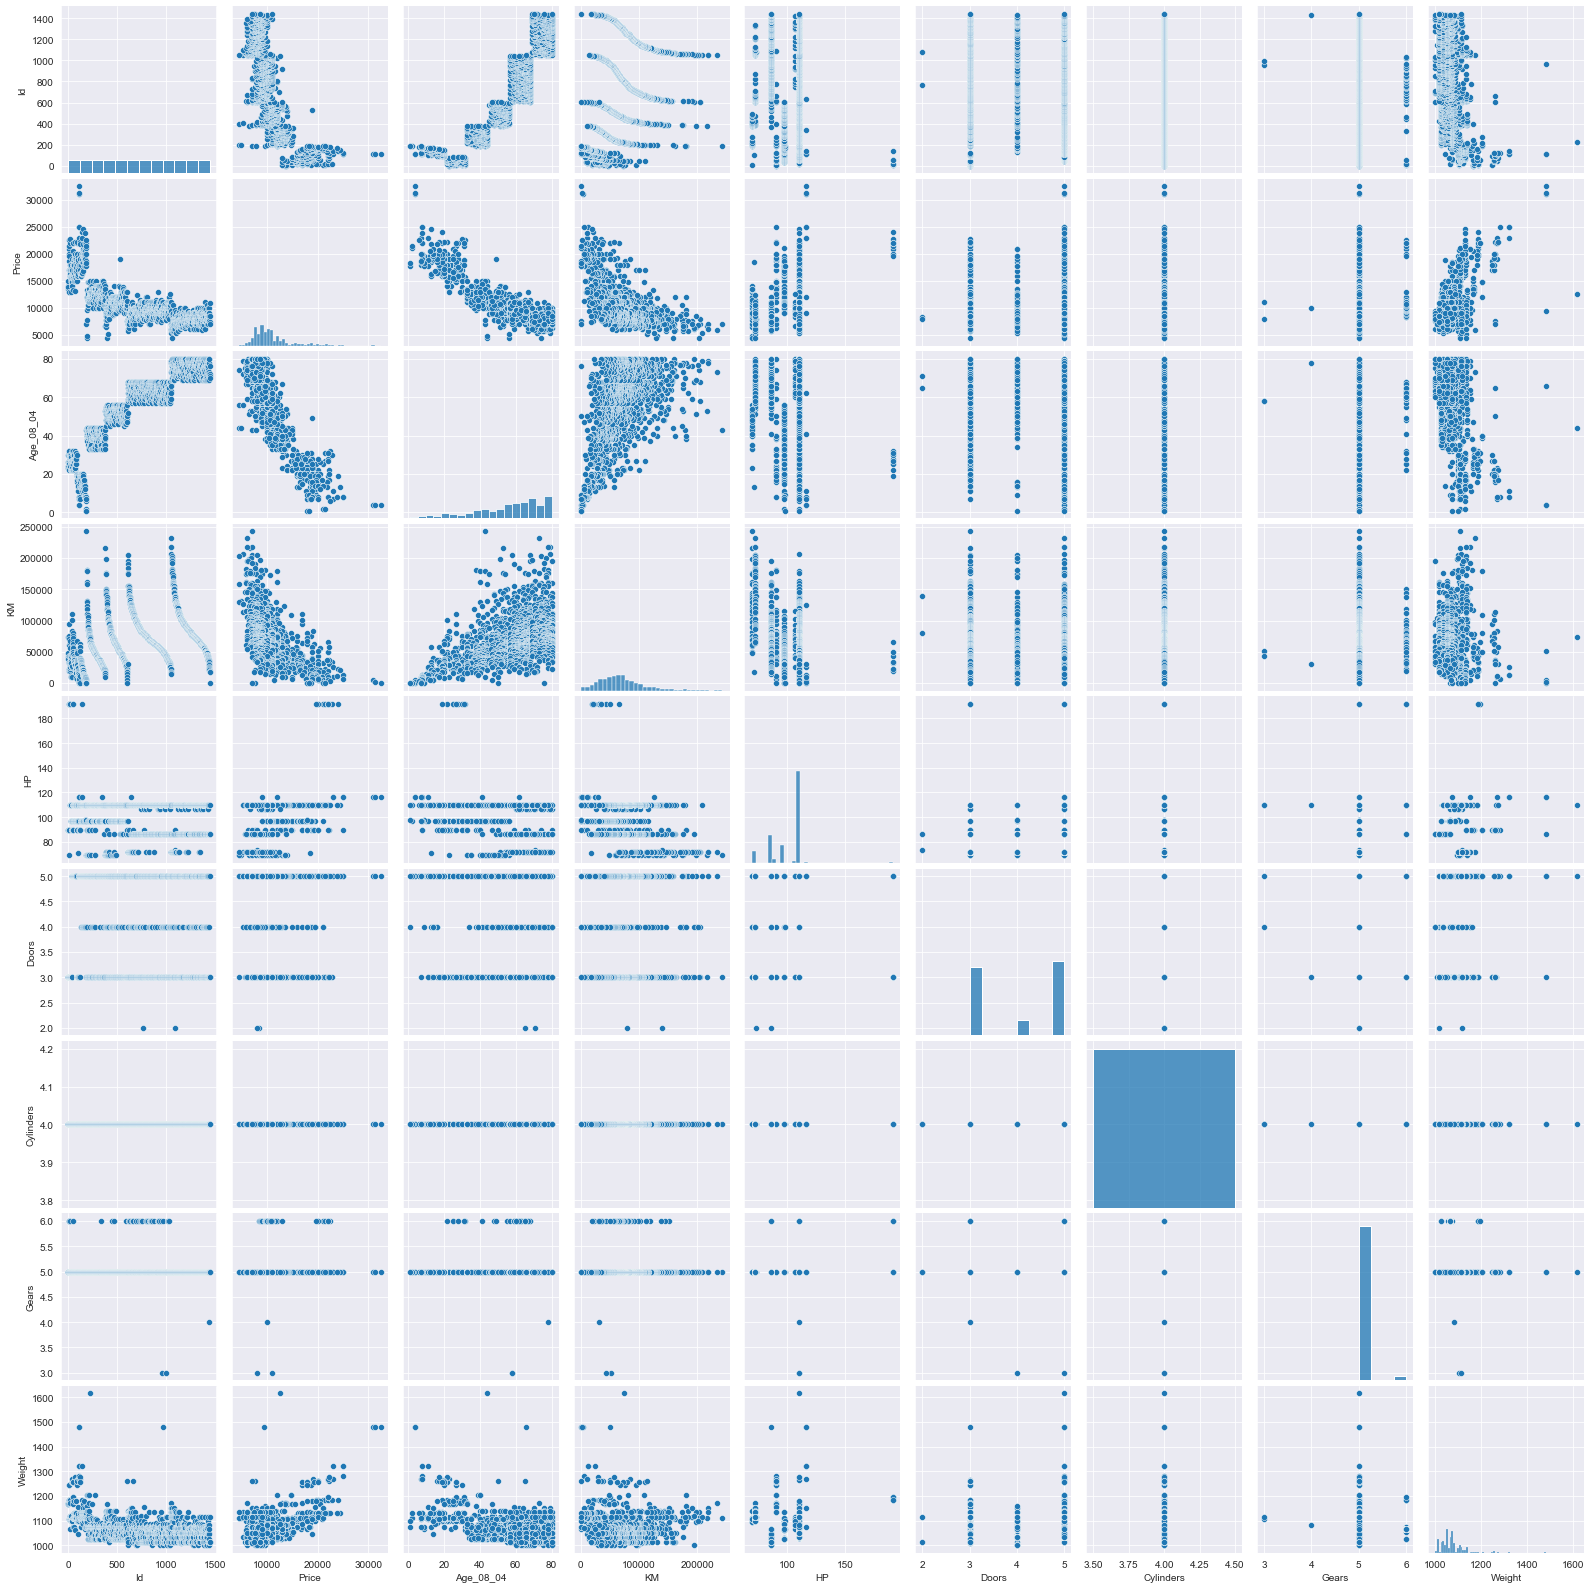

In [21]:
# Correlation Matrix
import seaborn as sns
df.corr()

#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [22]:
df.corr()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


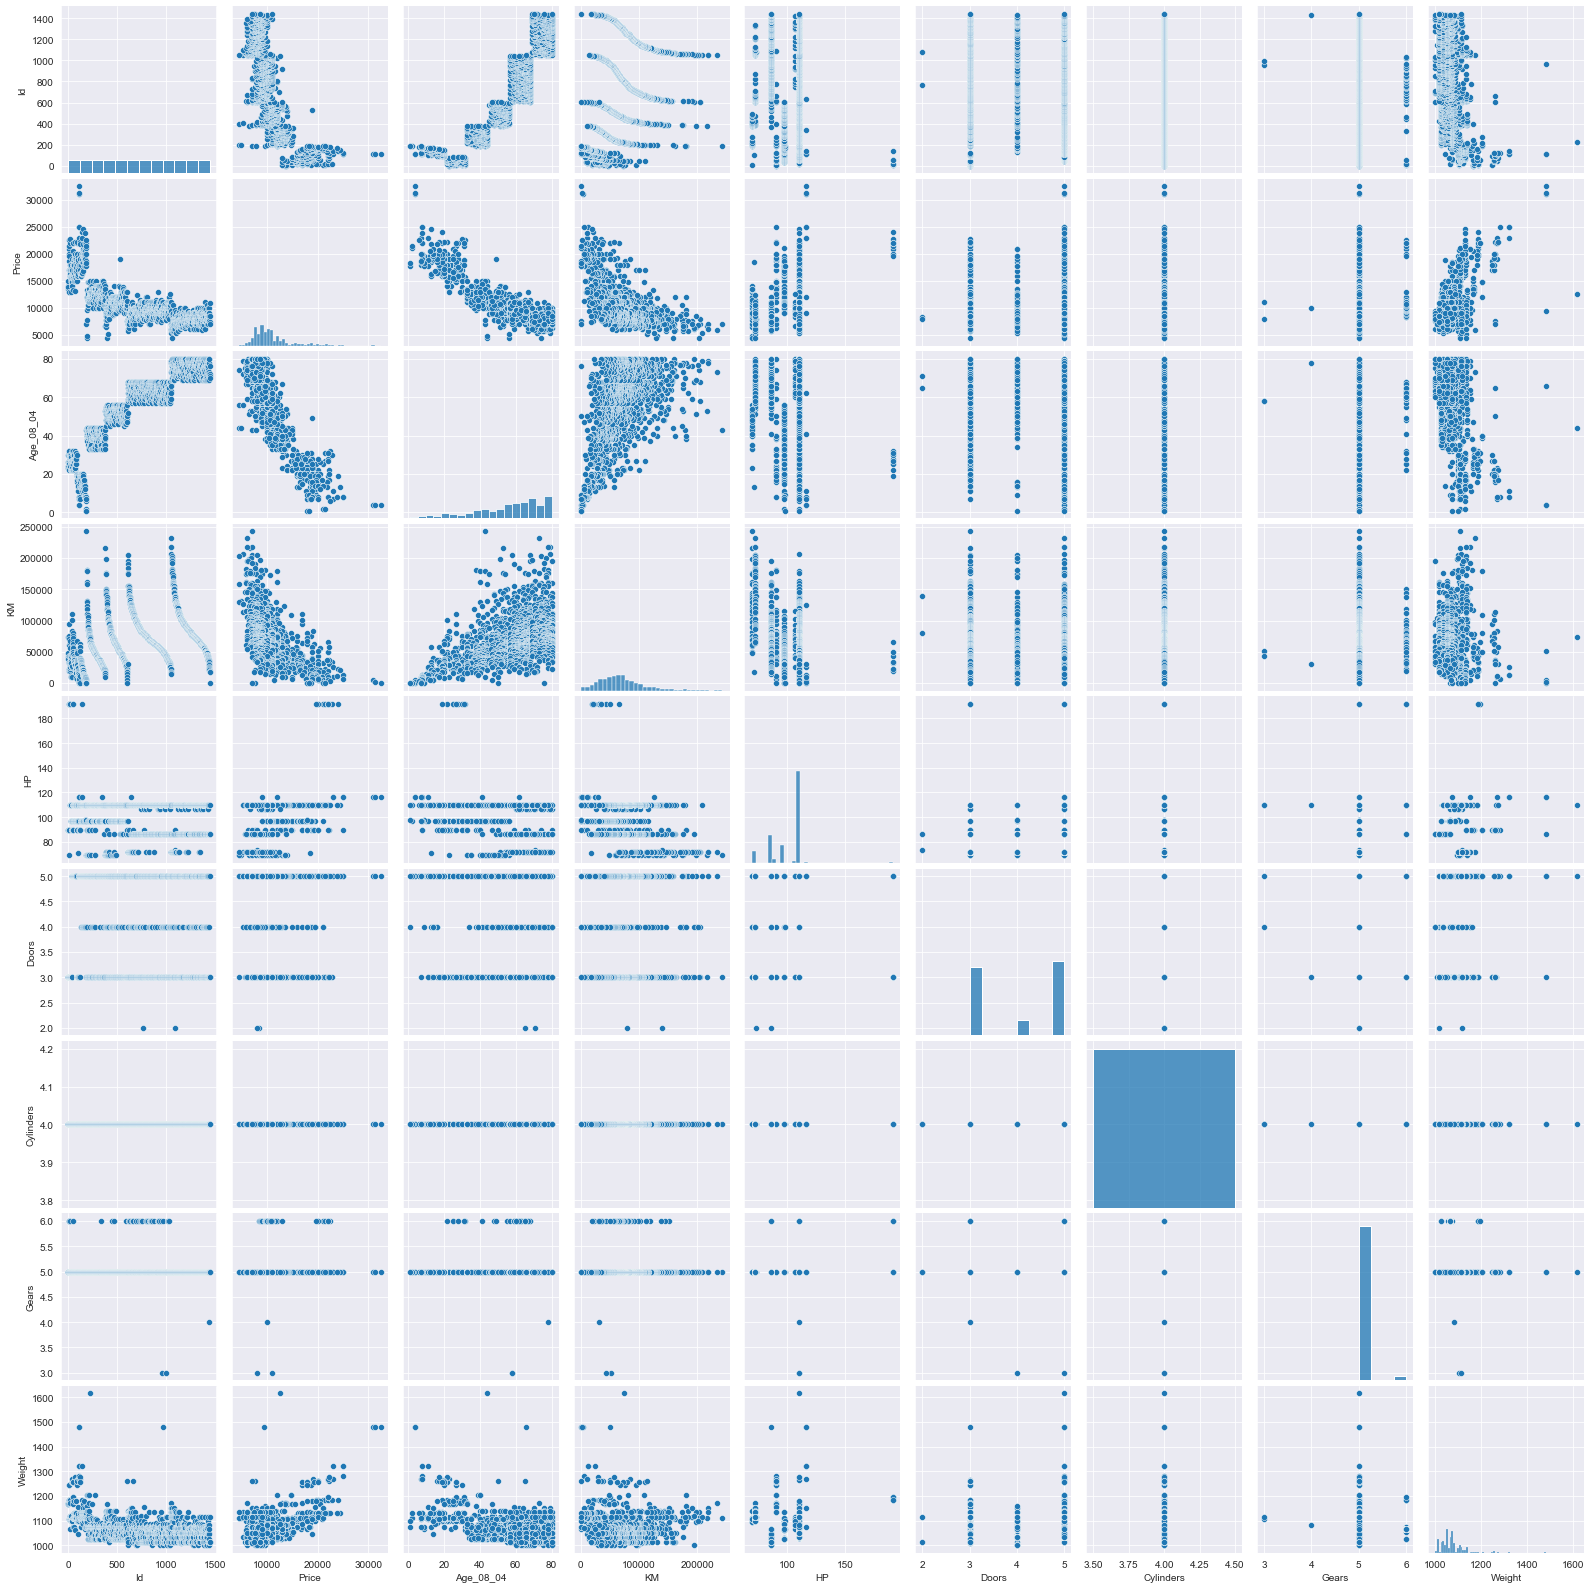

In [25]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

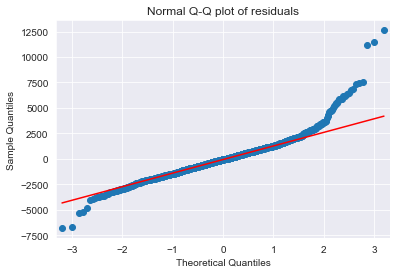

In [23]:
# Residual Analysis

import statsmodels.api as sm
import matplotlib.pyplot as plt

model = smf.ols('Price~KM+Age_08_04',data=df).fit()
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
import numpy as np
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   11,   12,   13,   14,   15,   16,   17,
          18,   19,   20,   21,   22,   23,   24,   26,   27,   28,   29,
          32,   38,   41,   43,   44,   45,   46,   48,   49,   50,   51,
          52,   53,   58,   59,   61,   62,   63,   64,   65,   66,   68,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   87,   89,   91,   92,   94,   95,   98,   99,  100,  102,
         104,  106,  108,  109,  110,  111,  112,  113,  114,  115,  116,
         118,  119,  120,  121,  123,  125,  128,  136,  138,  139,  141,
         142,  143,  144,  146,  147,  148,  149,  150,  151,  153,  154,
         156,  157,  158,  159,  160,  161,  162,  163,  165,  166,  167,
         168,  171,  172,  174,  175,  177,  178,  179,  182,  183,  188,
         190,  194,  196,  197,  204,  210,  211,  223,  238,  248,  253,
         262,  268,  274,  279,  283,  291,  294,  302,  304,  307,  311,
         315,  342,  345,  354,  359, 

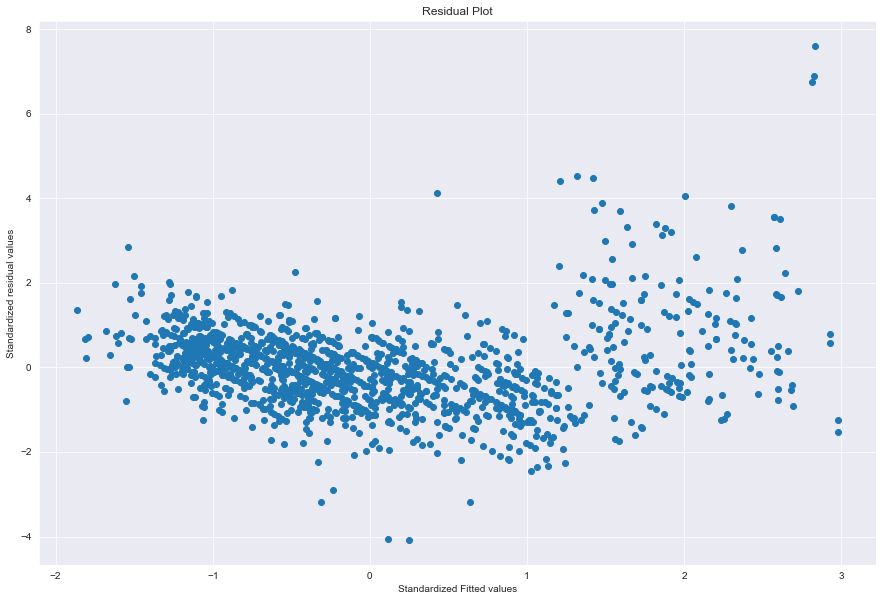

In [24]:
## Residual Plot for Homoscedasticity

model = smf.ols('Price~KM+Age_08_04',data=df).fit()

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


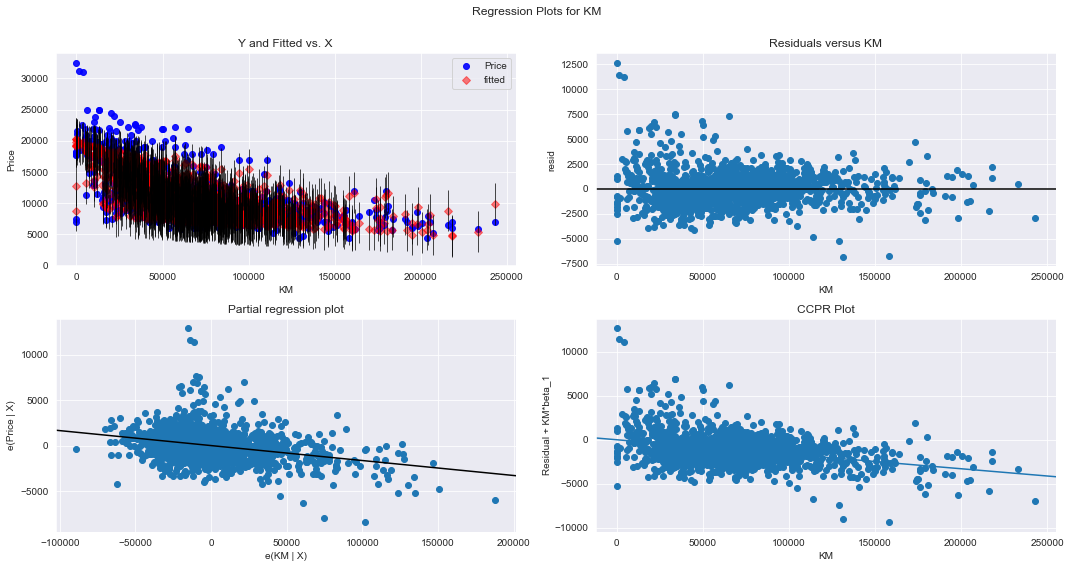

In [31]:
## Residual Vs Regressors
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
df=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/Latest-Data-Science-Assignments-Material/Day-14-Multi-Linear-Regression/Data-Sets/Toyoto_Corrola.csv",encoding='latin1')
model = smf.ols('Price~KM+Age_08_04',data=df).fit()


fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()


In [25]:
# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance


In [26]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(109, 0.1225510976325065)

In [27]:
## High Influence points


df.shape

(1436, 10)

In [28]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02298050139275766

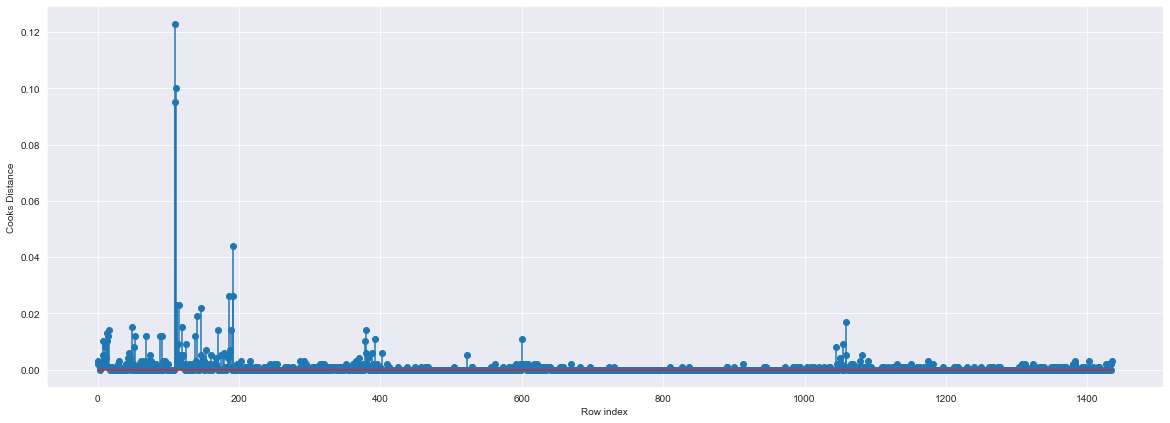

In [29]:
#Plot the influencers values using stem plot
import numpy as np
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

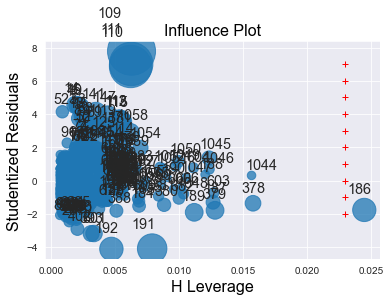

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
df=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/Latest-Data-Science-Assignments-Material/Day-14-Multi-Linear-Regression/Data-Sets/Toyoto_Corrola.csv",encoding='latin1')
model = smf.ols('Price~KM+Age_08_04',data=df).fit()


influence_plot(model,alhpa=0.6)
x=[leverage_cutoff for i in range(10)]

y=[i for i in range(-2,8)]

plt.plot(x,y,'r+')

plt.show()

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
df=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/Latest-Data-Science-Assignments-Material/Day-14-Multi-Linear-Regression/Data-Sets/Toyoto_Corrola.csv",encoding='latin1')
model = smf.ols('Price~KM+Age_08_04',data=df).fit()
df[df.index.isin([70, 76])]


,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
70,71,ÃTOYOTA Corolla 1.4 16V VVT I 5DR TERRA 4/5-D...,15950,28,29206,97,5,4,5,1110
76,77,TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors,18750,31,25266,110,5,4,5,1130


In [34]:
# Improving the model

#Load the data
df_new = pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/Latest-Data-Science-Assignments-Material/Day-14-Multi-Linear-Regression/Data-Sets/Toyoto_Corrola.csv",encoding='latin1')

#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df_new.drop(df_new.index[[70,76]],axis=0).reset_index()

df1

#Drop the original index
df1=df1.drop(['index'],axis=1)

df1

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÃTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [35]:
# Build Model

#Exclude variable "HP" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~KM+Age_08_04',data = df).fit()

(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.bic)

#Exclude variable "KM" and generate R-Squared and AIC values
final_ml_W= smf.ols('Price~HP+Age_08_04',data = df).fit()

(final_ml_W.rsquared,final_ml_W.aic,final_ml_W.bic)

(0.8007809828868712, 25302.76659155904, 25318.575441807865)

In [36]:
# Cook’s Distance

model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

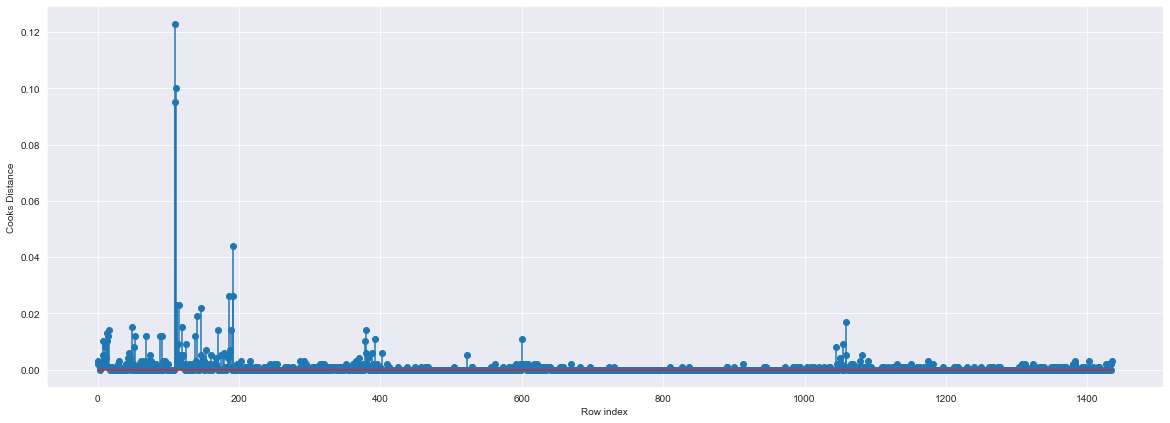

In [40]:
import numpy as np
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)+2),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [37]:
#index of the data points where c is more than .5

(np.argmax(c_V),np.max(c_V))

(109, 0.1225510976325065)

In [38]:
#Drop 76 and 77 observations

df2=df1.drop(df1.index[[76,77]],axis=0)

In [39]:
df2

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÃTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [40]:
#Reset the index and re arrange the row values

df3=df2.reset_index()

In [41]:
df4=df3.drop(['index'],axis=1)

In [42]:
df4

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÃTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1428,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1429,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1430,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [43]:
#Build the model on the new data

final_ml_V= smf.ols('Price~KM+Age_08_04',data = df4).fit()

In [44]:
#Again check for influencers

model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

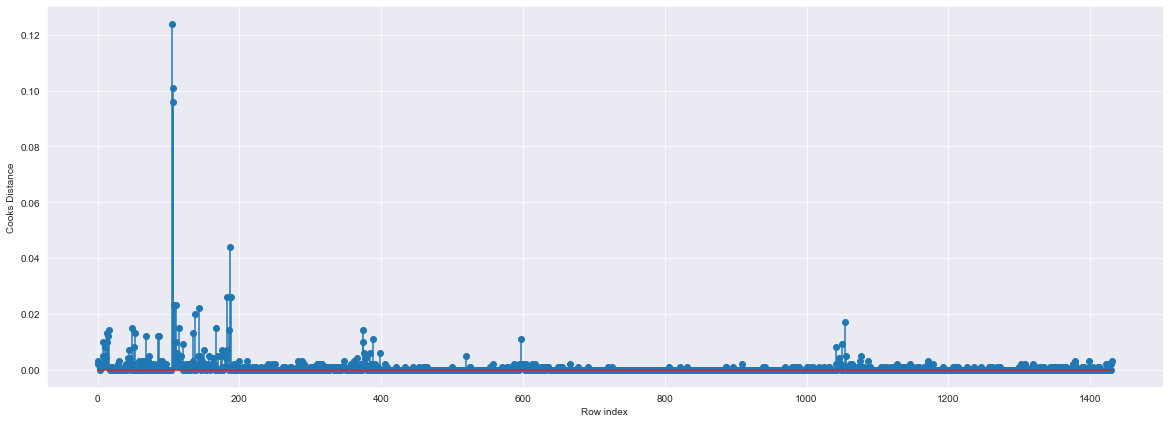

In [45]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [50]:
#index of the data points where c is more than .5

(np.argmax(c_V),np.max(c_V))

(105, 0.12400563046228603)

In [46]:
#Check the accuracy of the mode

final_ml_V= smf.ols('Price~KM+Age_08_04',data = df4).fit()

In [47]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.7890730713262663, 25306.854783695544)

In [48]:
## Predicting for new data

#New data for prediction
new_data=pd.DataFrame({'Price':40,"KM":95,"HP":102,"Age_08_04":35},index=[1])


In [49]:
final_ml_V.predict(new_data)

1    15076.082176
dtype: float64

In [50]:
final_ml_V.predict(df_new.iloc[0:5,])

0    16154.296534
1    15728.449756
2    16086.884163
3    15675.737359
4    15215.735961
dtype: float64

In [51]:
pred_y = final_ml_V.predict(df_new)

In [52]:
pred_y

0       16154.296534
1       15728.449756
2       16086.884163
3       15675.737359
4       15215.735961
            ...     
1431     9505.430314
1432     9068.847019
1433     9255.377024
1434     9410.991253
1435     8764.720868
Length: 1436, dtype: float64